In [15]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [16]:
# Generate a sample dataset
# genes
genes = ['gene' + str(i) for i in range(1,101)]
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]
data = pd.DataFrame(columns=[*wt, *ko], index=genes)

for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)

data

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,830,903,843,876,884,211,209,180,220,213
gene2,907,885,898,885,897,59,52,55,65,64
gene3,685,674,665,666,706,205,186,199,213,186
gene4,614,625,621,654,630,611,632,644,635,642
gene5,348,286,320,306,316,867,866,825,829,844
...,...,...,...,...,...,...,...,...,...,...
gene96,953,994,1005,985,954,924,925,895,949,939
gene97,434,402,437,424,402,723,676,706,696,678
gene98,799,818,775,787,730,142,139,146,139,159
gene99,84,67,62,62,64,81,79,89,76,94


In [17]:
# Preprocess data
scaled_data = preprocessing.scale(data.T)
# OR StandardScaler().fit_transform(data.T)

In [18]:
# Create a PCA object
pca = PCA()

# This is where we do all the PCA math (calculate loading scores and the variation each PC accounts for)
pca.fit(scaled_data)

# This is where we generate coordinates for a PCA graph based on the loading scores and the scaled data
pca_data = pca.transform(scaled_data)

<function matplotlib.pyplot.show(close=None, block=None)>

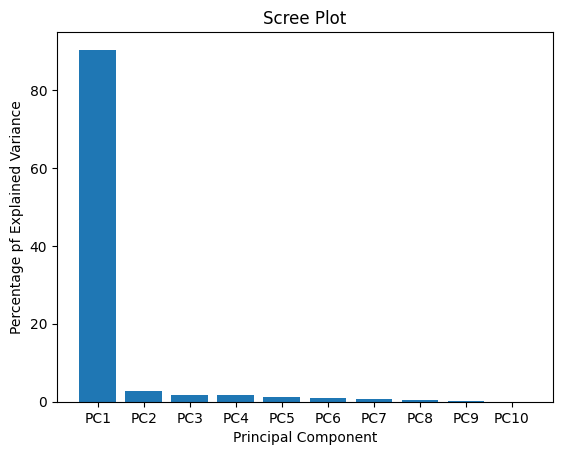

In [19]:
# Draw a graph
# Start with a scree plot to see how many PCs should go into the final plot
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage pf Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show

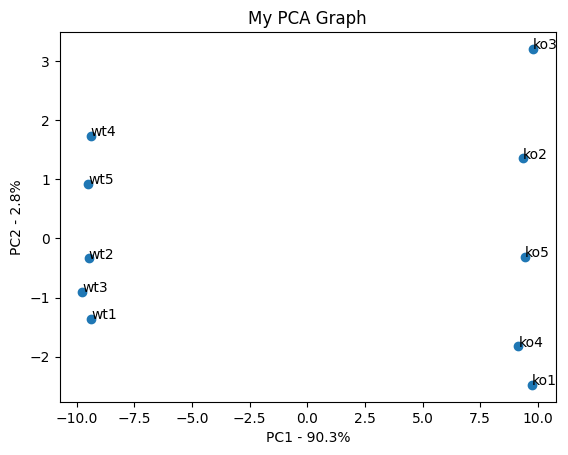

In [20]:
# Draw a PCA plot
# Put the new coordinates, created by pca.transform(scaled.data), into a matrix
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

<h4>The "wt" samples clustered on the left side, suggesting that they are correlated with each other</h4>
<h4>The "ko" samples clustered on the right side, suggesting that they are correlated with each other</h4>
<h4>And the separation of the two clusters along the x-axis suggests that "wt" samples are very different from "ko" samples</h4>

In [21]:
# Determine which genes had the biggest influence on PC1
# get the name of the top 10 measurements (genes) that contribute

# first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=genes)

# now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

# get the names of the top 10 genes
top_10_genes = sorted_loading_scores[0:10].index.values
 
# print the gene names and their scores (and +/- sign)
print(loading_scores[top_10_genes])

gene69    0.105233
gene2    -0.105225
gene46   -0.105225
gene53   -0.105196
gene24    0.105185
gene11    0.105181
gene26   -0.105173
gene59    0.105168
gene22    0.105160
gene72    0.105152
dtype: float64


<h4>These values are similar, so a lot of genes played a role in separating the samples, rather than just 1 or 2</h4>